- Object Tracking:
    - Referes to estimating the location of the object and predicting its location at a future time. 
    - In CV, it means detecting an object in a video frame and then predicting the location of the object in a subsequent frame
    - Two models required: 
        - Motion Model:
            - Estimates position and velocity of model in pixel coordinates. To predict location in future frames.
            - Provides approximation
        - Apperance Model: 
            - Encodes what object looks like and then searches the region around the predicted location from the motion model to find tune the location.
            - Fine tuning

    - Opencv Tracker Class Algorithms:
        1. Boosting
        2. MIL 
        3. KCF
        4. CRST
        5. TLD
        These tend to recover from occulusions well
        6. MEDIANFLOW
        Good for predicatble slow motion
        7. GOTURN
        The only Deep Learning Based, Most Accurate - Requires Weights download (see 5:23)
        8. MOSSE
        Fastest

    Steps: 
    - Specify inital location of the object with bounding box. (Upper left and lower right coordinates) This is the inital information. the goal is to produce subsequent bounding boxes in future frames.
    - 



In [61]:
# Import Modules
import cv2 as cv
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

In [62]:
video_file = "/Users/nicholasrethans/Documents/GitHub/ECE-3332-Microcontroller-Project-Lab/Instructionals/ObjectTracking/Test Car Video.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
            # x             y
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
            # x+w                       y+h
    cv.rectangle(frame, p1, p2, (0,255,0), 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv.cvtColor(frameCopy, cv.COLOR_RGB2BGR)
    plt.imshow(frameCopy); plt.axis('off')

def drawText(frame, txt, location, color = (50,170,50)):
    cv.putText(frame, txt, location, cv.FONT_HERSHEY_SIMPLEX, 1, color, 3)


In [63]:
# Creating Tracker Instance
tracker_types = ['BOOSTING','MIL','KCF','CSRT','TLD','MEDIANFLOW','GOTURN','MOSSE']

#Change the index to change the tracker type
tracker_type = tracker_types[7]

if tracker_type == 'BOOSTING':
    tracker = cv.legacy.TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv.TrackerMIL.create()
elif tracker_type == 'KCF':
    tracker = cv.TrackerKCF.create()
elif tracker_type == 'CSRT':
    tracker = cv.legacy.TrackerCSRT.create()
elif tracker_type == 'TLD':
    tracker = cv.legacy.TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW':
    tracker= cv.legacy.TrackerMedianFlow.create()
elif tracker_type == 'GOTURN': #requires weights I dont have downloaded
    tracker = cv.TrackerGOTURN.create()
elif tracker_type == 'MOSSE':
    tracker = cv.legacy.TrackerMOSSE.create()
else:
    tracker = cv.legacy.TrackerMOSSE.create()

In [64]:
#read video (can change to webcam)
video = cv.VideoCapture(video_file)
_,frame = video.read()
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else:
    width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

video_file = 'race_car'+tracker_type+'.mp4'
video_out = cv.VideoWriter(video_file,cv.VideoWriter.fourcc(*'mp4v'),10,(width,height))

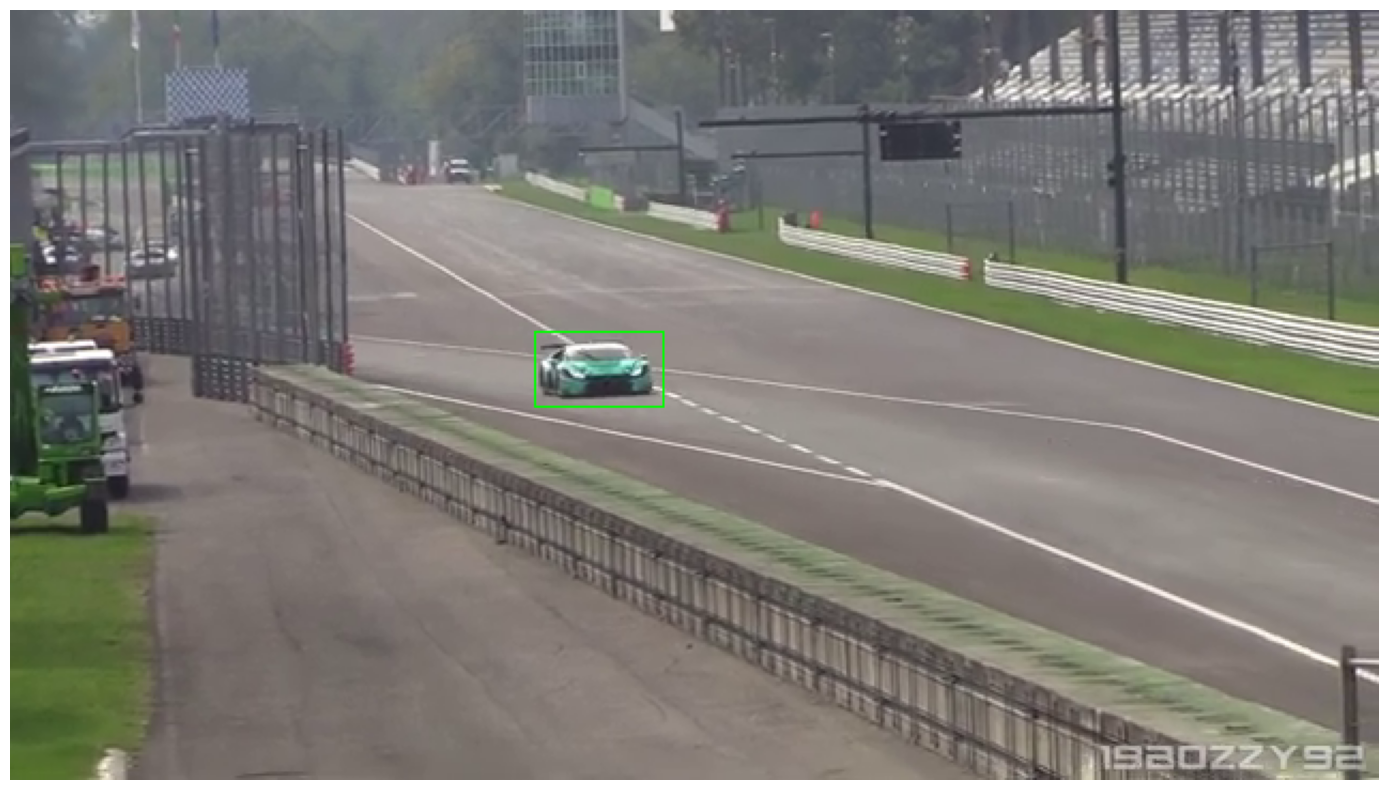

In [65]:
#Define Bounding Box (Later Done by yolo)
bbox = (245, 150, 60, 35) #initial bounding box upper left and lower right coordinates
       #x, y, w  , h
displayRectangle(frame,bbox)

In [66]:
#Initialize Tracker
_ = tracker.init(frame,bbox)

In [67]:
#Read frames and track object
while True:
    _, frame = video.read()
    if not _:
        break

    # Update timer
    timer = cv.getTickCount()
    # Update tracker
    _, bbox = tracker.update(frame)
    # Calculate FPS
    fps=cv.getTickFrequency()/(cv.getTickCount()-timer)
    # Draw bounding box
    if _:
        drawRectangle(frame,bbox)
    else:
        drawText(frame,"Tracking failure detected", (80,140),(0,0,225))
    # Display Info
    drawText(frame,tracker_type+"Tracker", (80,60))
    drawText(frame, "FPS : "+str(int(fps)), (80,100))
    #Write frame to video
    video_out.write(frame)
video.release()
video_out.release()